In [208]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.image as mpimg

In [225]:
"""
Citation:
# P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
# In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence,
# Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,
Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.
"""
data = pd.read_csv("forestfires.csv")

In [17]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


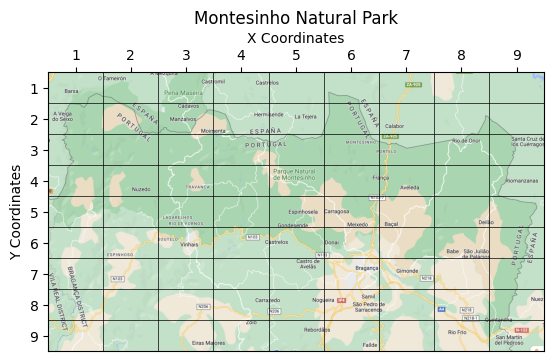

In [213]:
# Reference image
img = mpimg.imread("Montesinho Natural Park Nov 2023 .png")

# Subplots
fig, ax = plt.subplots()

ax.imshow(img)

grid_rows = 9
grid_cols = 9

# Determine the width and height of each cell in grid
cell_width = img.shape[1] / grid_cols
cell_height = img.shape[0] / grid_rows

# Draw grid lines
for i in range(grid_cols + 1):
    x = i * cell_width
    ax.axvline(x, color='black', linewidth=0.5)

for i in range(grid_rows + 1):
    y = i * cell_height
    ax.axhline(y, color='black', linewidth=0.5)

# Set the axis limits to match the image size
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)

# Set axis ticks
ax.set_xticks([cell_width / 2 + i * cell_width for i in range(grid_cols)])
ax.set_xticklabels([str(i + 1) for i in range(grid_cols)])
ax.set_yticks([cell_height / 2 + i * cell_height for i in range(grid_rows)])
ax.set_yticklabels([str(i + 1) for i in range(grid_rows)])

# Set axis labels
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.xaxis.set_label_position('top') 
ax.set_title('Montesinho Natural Park')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')

plt.show()

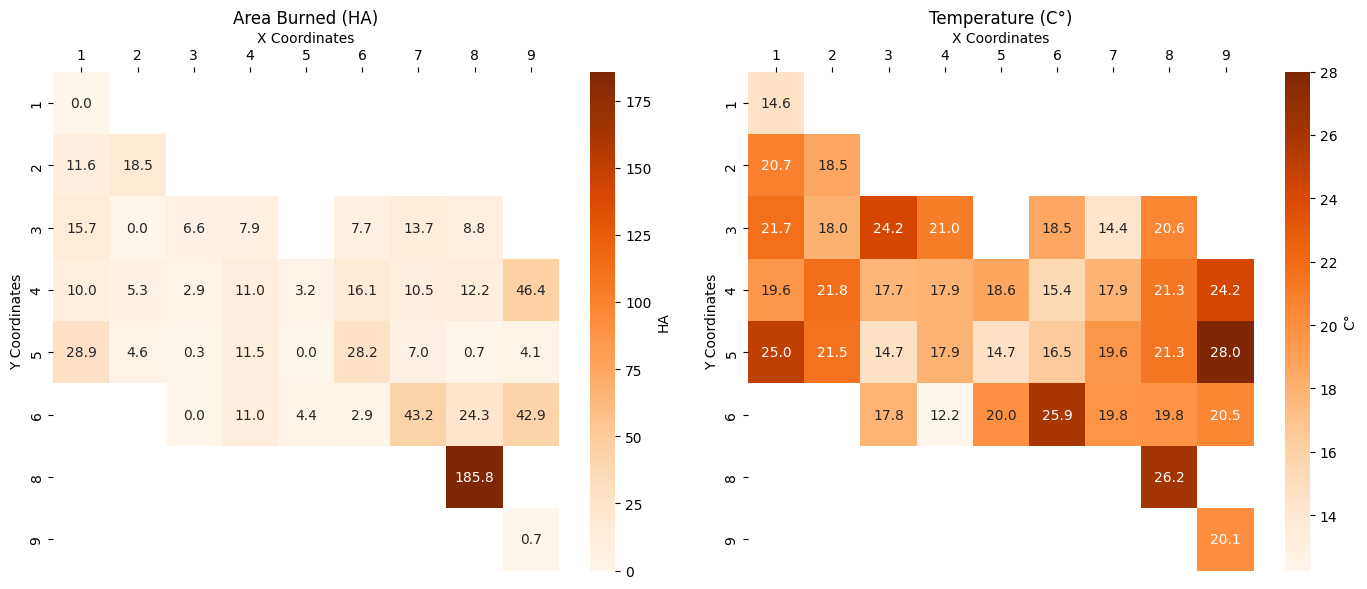

In [236]:
# Get information from data set
x_coordinates = data["X"]
y_coordinates = data["Y"]
area_values = data["area"]
temp_values = data["temp"]
wind_values = data["wind"]
humidity_values = data["RH"]

# Package data into pivot table
area_heatmap_data = data.pivot_table(values='area', index='Y', columns='X')
temp_heatmap_data = data.pivot_table(values='temp', index='Y', columns='X')
wind_heatmap_data = data.pivot_table(values='wind', index='Y', columns='X')
humidity_heatmap_data = data.pivot_table(values='RH', index='Y', columns='X')

# Prepare subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ax1, ax2 = axs.flatten()

# Plot sublots
ax1.set_title('Area Burned (HA)')
sns.heatmap(area_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", cbar_kws={'label': 'HA'}, ax=ax1)

ax2.set_title('Temperature (C°)')
sns.heatmap(temp_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", cbar_kws={'label': 'C°'}, ax=ax2)

for ax in [ax1, ax2]:
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('X Coordinates')
    ax.set_ylabel('Y Coordinates')

plt.tight_layout()

plt.show()

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

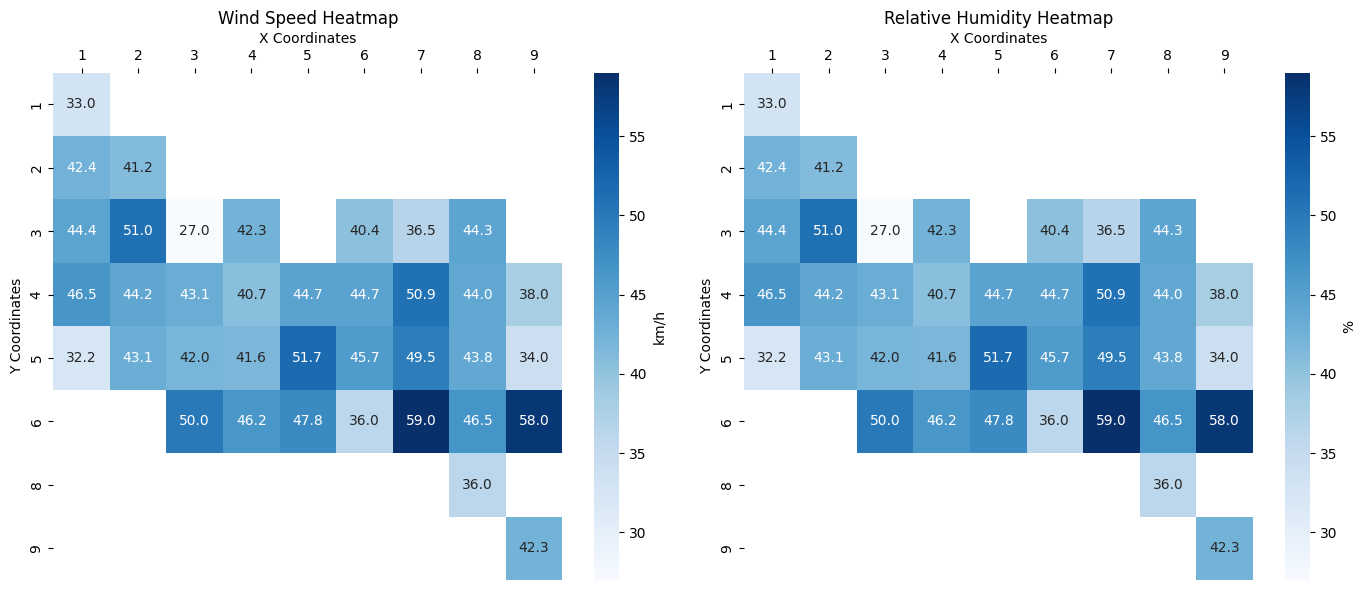

In [237]:
# Prepare subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ax3, ax4 = axs.flatten()

ax3.set_title('Wind Speed Heatmap')
sns.heatmap(heatmap3_data, cmap='Blues', annot=True, fmt=".1f", cbar_kws={'label': 'km/h'}, ax=ax3)

ax4.set_title('Relative Humidity Heatmap')
sns.heatmap(heatmap4_data, cmap='Blues', annot=True, fmt=".1f", cbar_kws={'label': '%'}, ax=ax4)

for ax in [ax3, ax4]:
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('X Coordinates')
    ax.set_ylabel('Y Coordinates')

plt.tight_layout()

plt.show()

In [ ]:
# Get information from data set
ffmc_values = data["FFMC"]
dmc_values = data["DMC"]
dc_values = data["DC"]
isi_values = data["ISI"]

print(list(colormaps))


# Package data into pivot table
ffmc_heatmap_data = data.pivot_table(values='FFMC', index='Y', columns='X')
dmc_heatmap_data = data.pivot_table(values='DMC', index='Y', columns='X')
dc_heatmap_data = data.pivot_table(values='DC', index='Y', columns='X')
isi_heatmap_data = data.pivot_table(values='ISI', index='Y', columns='X')

# Prepare subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 6))
ax5, ax6, ax7, ax8 = axs.flatten()

# Plot sublots
ax5.set_title('Fine Fuel Moisture Code (FFMC)')
sns.heatmap(ffmc_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", cbar_kws={'label': 'HA'}, ax=ax5)

ax6.set_title('Duff Moisture Code (DMC)')
sns.heatmap(dmc_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", cbar_kws={'label': 'C°'}, ax=ax6)

ax7.set_title('Drought Code (DC)')
sns.heatmap(dc_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", cbar_kws={'label': 'C°'}, ax=ax7)

ax8.set_title('Initial Spread Index (ISI)')
sns.heatmap(isi_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", cbar_kws={'label': 'C°'}, ax=ax8)


for ax in [ax5, ax6, ax7, ax8]:
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('X Coordinates')
    ax.set_ylabel('Y Coordinates')

plt.tight_layout()

plt.show()